In [43]:
import numpy as np
from numpy import diag, sqrt
from numpy.linalg import eigh
import matplotlib.pyplot as plt

![Problem 1](./P1.png)

# a.

In [44]:
A = np.array([[5 / 8, -3 / 8], [-3 / 8, 5 / 8]])
A

array([[ 0.625, -0.375],
       [-0.375,  0.625]])

# b.

In [45]:
lambdas, V = eigh(A)
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [46]:
D = diag(lambdas)
D

array([[0.25, 0.  ],
       [0.  , 1.  ]])

# c.

In [47]:
f = lambda x, lamb: x/sqrt(lamb)
f(1, lambdas)

array([2., 1.])

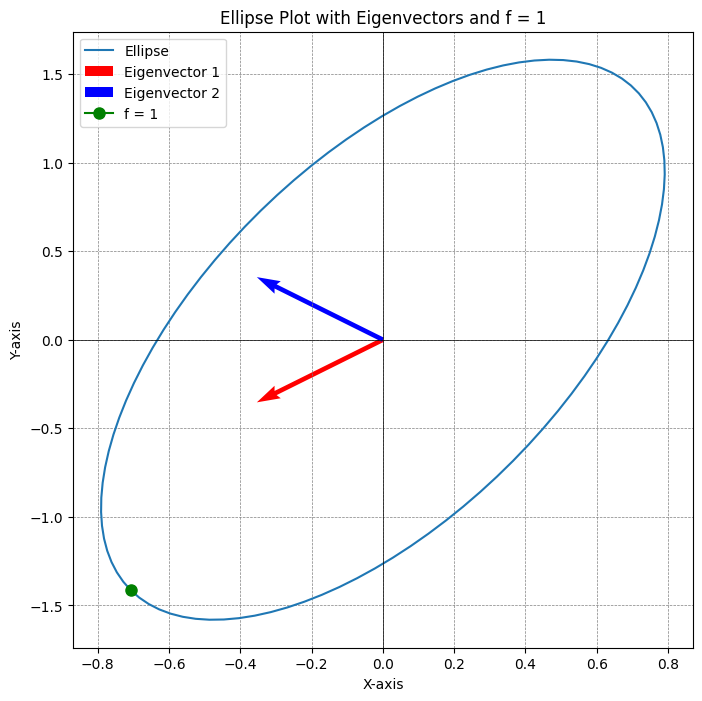

In [48]:

# Generate points on the unit circle
theta = np.linspace(0, 2 * np.pi, 100)
x_unit_circle = np.cos(theta)
y_unit_circle = np.sin(theta)

# Scale the points using the lambda function
scaled_x = f(x_unit_circle, lambdas[0])
scaled_y = f(y_unit_circle, lambdas[1])

# Transform points to ellipse using the decomposition
ellipse_points = np.dot(np.dot(np.array([scaled_x, scaled_y]).T, V), diag(sqrt(lambdas)))

# Plot the ellipse
plt.figure(figsize=(8, 8))
plt.plot(ellipse_points[:, 0], ellipse_points[:, 1], label='Ellipse')

# Plot the eigenvectors
origin = np.zeros_like(V[:, 0])
plt.quiver(*origin, *V[:, 0], scale=2, scale_units='xy', angles='xy', color='red', label='Eigenvector 1')
plt.quiver(*origin, *V[:, 1], scale=2, scale_units='xy', angles='xy', color='blue', label='Eigenvector 2')

# Plot the ellipse for f = 1
ellipse_f1_points = np.dot(np.dot(np.array([f(1, lambdas[0]), 0]), V.T), diag(sqrt(lambdas)))
plt.plot(ellipse_f1_points[0], ellipse_f1_points[1], marker='o', markersize=8, color='green', label='f = 1')

plt.title('Ellipse Plot with Eigenvectors and f = 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
